# Importing Packages and Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
Prices = pd.read_csv("BPI.csv")

In [3]:
# from datetime import datetime

# def to_date(DataFrame):
#     DataFrame['Date'] = [datetime.strptime(x, '%B %d, %Y %I:%M:%S %p').strftime('%m/%d/%y') for x in DataFrame['Date_Time']]
#     DataFrame['Date'] = pd.to_datetime(DataFrame['Date'])

In [4]:
# investa_df = pd.read_csv("Investagrams_DataFrame.csv")
# investa_df['Stock_Code'] = investa_df['Stock_Code'].str.strip()
# investa_df['Date_Time'] = investa_df['Date_Time'].replace(u'\xa0', u'').str.strip()

In [5]:
# to_date(investa_df)
# investa_df = investa_df[['Links', 'Date']]

In [6]:
#news_df = pd.read_csv("all_news_edit_2.csv").drop(columns='Unnamed: 0')

In [7]:
#news_df = news_df.merge(investa_df, how='left', left_on='Link', right_on='Links')

In [8]:
# news_df['Date_x'].fillna(news_df['Date_y'], inplace=True)
# news_df.rename(columns={'Date_x': 'Date'}, inplace=True)
# news_df = news_df.drop(columns = ['Links', 'Date_y'])

In [9]:
# news_df.to_csv('complete_dates_all_news.csv', index=False)

In [10]:
news_df = pd.read_csv("complete_dates_all_news.csv")

In [11]:
news_df

,Date,Source,Body,Link,Title,stock
0,7/13/21,colfinancial,Top Story: - Fitch maintains PH credit rating...,NaN,Top Story: - Fitch maintains PH credit rating...,other
1,7/12/21,colfinancial,$MPI: Toll road demand weakened in April with ...,NaN,$MPI: Toll road demand weakened in April with ...,other
2,7/12/21,colfinancial,To get a weekly email of our outlook on equiti...,NaN,To get a weekly email of our outlook on equiti...,other
3,7/12/21,colfinancial,Given the risk-off sentiment in stocks along w...,NaN,Given the risk-off sentiment in stocks along w...,other
4,7/12/21,colfinancial,#mutualfundsph #COLfundsource #COLFinancial h...,NaN,#mutualfundsph #COLfundsource #COLFinancial h...,other
...,...,...,...,...,...,...
53559,7/21/20,Manila Bulletin,"The annual stockholders meeting of iPeople, In...",https://mb.com.ph/2020/07/21/ipeople-notice-of...,iPeople Notice of Annual Stockholders Meeting,IPO
53560,7/20/20,Manila Bulletin,While pork prices in Luzon have risen markedly...,https://mb.com.ph/2020/07/20/hog-raisers-from-...,Hog raisers from Vis-Min suffering from low pr...,other
53561,7/20/20,Manila Bulletin,A full year into the era of 5th generation (5G...,https://mb.com.ph/2020/07/20/ph-most-improved-...,"PH most improved in video experience, says lat...",PSEI
53562,7/20/20,Manila Bulletin,Trade and Industry Secretary Ramon M. Lopez ye...,https://mb.com.ph/2020/07/20/banks-urged-anew-...,Banks urged anew to extend loan payments by 1...,other


In [12]:
news_df['stock'].value_counts().head(10)

other    29128
PSEI      6832
PSEi       950
AC         801
MER        607
GLO        592
SMC        536
SM         535
PSE        474
ABS        443
Name: stock, dtype: int64

In [13]:
news_df['stock'] = news_df['stock'].replace({'PSEi': 'PSEI', 'PSE': 'PSEI'})

In [14]:
values = ['PSEI','AC','MER','GLO','SMC','SM','ABS','PAL','BPI','BDO']
conditions = list(map(news_df['stock'].str.contains, values))
news_df['stock-rename'] = np.select(conditions, values, 'other')

In [15]:
for_plot = news_df['stock-rename'].value_counts()
for_plot

other    40332
PSEI      8256
AC         959
SM         638
MER        607
GLO        592
SMC        536
ABS        443
PAL        426
BPI        413
BDO        362
Name: stock-rename, dtype: int64

<AxesSubplot:>

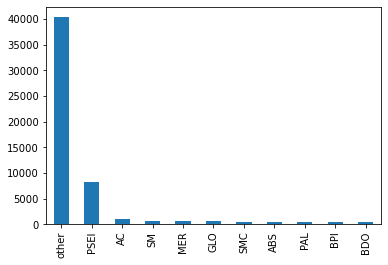

In [16]:
for_plot.plot(kind="bar")

In [17]:
Stock_df = news_df[news_df['stock'] == 'BPI'].reset_index().drop(columns='index')

In [18]:
Stock_df[Stock_df.Date.isnull()]

,Date,Source,Body,Link,Title,stock,stock-rename


# Text Preprocessing

In [19]:
import pandas as pd
import numpy as np

import contractions
import string

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import pysentiment2 as ps
lm = ps.LM()
hiv4 = ps.HIV4()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nillethmaeannvpontino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nillethmaeannvpontino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def to_lowercase(text):
  text = text.lower()
  return text

def fix_contractions(text):
  text = contractions.fix(text)
  return text

    
def lm_tokenize(text,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = lm.tokenize(text)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

########################################################################

def lm_preprocess_text(text):
    
    text = to_lowercase(text) # lower case
    text = fix_contractions(text) # replace contractions
    
    tokens = lm_tokenize(text, keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False)
        
    return tokens

# Getting Sentiment Scores using Harvard IV dictionary

In [21]:
#harvard IV dictionary
# def get_hiv4_score(DF1): #edit ['Bodies'] if diff col_name
#     DF1['hiv4_tokens'] = DF1.apply(lambda row: hiv4_preprocess_text(row['Body']),axis=1)
#     DF1['hiv4_score'] = [hiv4.get_score(x) for x in DF1['hiv4_tokens']]
    
#     # Iterate through the headlines and get the polarity scores
#     hiv4_scores = DF1['hiv4_score'].tolist()
    
#     # Convert the 'scores' list of dicts into a DataFrame
#     hiv4_scores_df = pd.DataFrame(hiv4_scores)
    
#     # Join the DataFrames of the news and the list of dicts
#     DF1 = DF1.join(hiv4_scores_df, rsuffix='_hiv4')
    
#     #removing unnecessary columns 
#     DF1 = DF1.drop(columns=['Positive', 'Negative','hiv4_score','Subjectivity', 'hiv4_tokens'])
    
#     return DF1

In [22]:
#LM dictionary
def get_lm_score(DF1): #edit ['Bodies'] if diff col_name
    #consolidated['tokens'] = [lm.tokenize(x) for x in consolidated['Title']]
    DF1['lm_tokens'] = DF1.apply(lambda row: lm_preprocess_text(row['Body']),axis=1)
    DF1['lm_score'] = [lm.get_score(x) for x in DF1['lm_tokens']]

    # Iterate through the headlines and get the polarity scores
    lm_scores = DF1['lm_score'].tolist()

    # Convert the 'scores' list of dicts into a DataFrame
    lm_scores_df = pd.DataFrame(lm_scores)

    # Join the DataFrames of the news and the list of dicts
    DF1 = DF1.join(lm_scores_df, rsuffix='_right')
    
    #removing unnecessary columns 
    DF1 = DF1.drop(columns=['Positive', 'Negative','Subjectivity'])
    
    return DF1

In [23]:
get_lm_score(Stock_df)

,Date,Source,Body,Link,Title,stock,stock-rename,lm_tokens,lm_score,Polarity
0,4/28/21,colfinancial,$BPI earnings down 22% due to one-off tax expe...,NaN,$BPI earnings down 22% due to one-off tax expe...,BPI,BPI,"[bpi, earn, due, tax, expens, line, estim, ful...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
1,4/23/21,colfinancial,Other News: - $BPI is interested on bidding f...,NaN,Other News: - $BPI is interested on bidding f...,BPI,BPI,"[news, bpi, interest, bid, ph, consum]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
2,4/23/21,colfinancial,Top Stories: - $BPI: Earnings slightly underp...,NaN,Top Stories: - $BPI: Earnings slightly underp...,BPI,BPI,"[top, bpi, earn, slightli, underperform, highe...","{'Positive': 0, 'Negative': 2, 'Polarity': -0....",-1.000000
3,4/14/21,colfinancial,$BPI: Recovery to pre-pandemic levels not seen...,NaN,$BPI: Recovery to pre-pandemic levels not seen...,BPI,BPI,"[bpi, recoveri, pre, pandem, level, seen, full...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
4,4/14/21,colfinancial,Top Story: - $BPI: Recovery to pre-pandemic l...,NaN,Top Story: - $BPI: Recovery to pre-pandemic l...,BPI,BPI,"[top, bpi, recoveri, pre, pandem, level, seen,...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
...,...,...,...,...,...,...,...,...,...,...
408,4/22/21,Manila Bulletin,Bank of the Philippine Islands posted a 21.7 p...,https://mb.com.ph/2021/04/22/bpi-net-income-sh...,BPI net income shrinks 22% to P5 billion in fi...,BPI,BPI,"[percent, drop, net, incom, p, pre, tax, incom...","{'Positive': 2, 'Negative': 6, 'Polarity': -0....",-0.500000
409,3/26/21,Manila Bulletin,"BPI Family Savings Bank (BFSB), the consumer a...",https://mb.com.ph/2021/03/26/bpi-family-saving...,BPI Family Savings Bank gets triple-A rating,BPI,BPI,"[bpi, famili, save, bfsb, consum, retail, arm,...","{'Positive': 11, 'Negative': 5, 'Polarity': 0....",0.375000
410,10/11/20,Manila Bulletin,"Bank of Philippines Islands (BPI), the country...",https://mb.com.ph/2020/10/11/online-payment-is...,"Online payment is becoming a necessity, says BPI",BPI,BPI,"[bpi, lead, commerci, said, busi, need, digit,...","{'Positive': 21, 'Negative': 4, 'Polarity': 0....",0.680000
411,1/29/21,Manila Bulletin,Bank of the Philippine Islands posted a 25.7 p...,https://mb.com.ph/2021/01/29/bpi-posts-26-prof...,BPI posts 26% profit drop on higher provisions,BPI,BPI,"[percent, drop, net, incom, p, p, earn, due, h...","{'Positive': 2, 'Negative': 7, 'Polarity': -0....",-0.555555


## Get Date from col Date_time

In [24]:
from datetime import datetime

def to_date(DataFrame):
    #DataFrame['Date'] = [datetime.strptime(x, '%B %d, %Y %I:%M:%S %p').strftime('%m/%d/%y') for x in DataFrame['Date_Time']]
    DataFrame['Date'] = pd.to_datetime(DataFrame['Date'])

## changing weekend dates to following mondays

In [25]:
from datetime import datetime, timedelta

def wkend_to_monday(input_date_col):
    no_wkend = []
    for d in input_date_col:
        weekno = d.weekday()
        if weekno == 5: #saturday + 2 days
            no_wkend.append(d + timedelta(days = 2))
        elif weekno == 6: #saturday + 1 day
            no_wkend.append(d + timedelta(days = 1))
        else:
            no_wkend.append(d)

    input_date_col = pd.to_datetime(no_wkend)

## date reduction with polarity aggregations

In [26]:
#Date Reduction
#Creating new_df with single dates
#code->  GLO_mean_score = pd.DataFrame(GLO_score['Date'].unique(), columns=['Date'])

In [27]:
#Mean of Scores
#DataFrame = new_df with single dates
def get_mean_SS(DataFrame, DF2): #edit ['Date'] and/or ['Polarity'] if diff col_name
    mean_score = []
    for sd in DF2['Date']:
        mean_score.append(DataFrame[DataFrame['Date'] == sd]['Polarity'].mean())

    DF2['Mean_Score'] = mean_score

In [28]:
#Percentage of Positive News Sentiment
#DataFrame = new_df with single dates
def get_percent_pos_SS(DataFrame, DF2): #edit ['Date'] and/or ['Polarity'] if diff col_name
    percent_pos_sent = []
    for sd in DF2['Date']:
        date_data = DataFrame[DataFrame['Date'] == sd]
        num_pos = len(date_data[date_data['Polarity'] > 0]) #sentiment score  >0   or   >=0
        percent_pos_sent.append(num_pos/len(date_data))

    DF2['Percent_of_PosSent'] = percent_pos_sent

## Daily Stock Price Change

In [29]:
#Daily Stock Price Change
def day_price_change(df_histprice):
    df_histprice['Price_Change'] = (df_histprice[' Close']-df_histprice[' Open'])/df_histprice[' Open']

# Combining Prices with Sentiment Score

In [30]:
#equate with output_df
def combine_prices_SS(df_histprice, df_SS):
    df_histprice['Date'] = pd.to_datetime(df_histprice['Date'])
    output_df = df_histprice.merge(df_SS, how='left', on = 'Date').ffill().bfill()
    
    return output_df

---

In [31]:
def df_for_plot(DataFrame, df_histprice):
    
    #Process with Article_df
    DataFrame = get_lm_score(DataFrame)
    
    to_date(DataFrame)

    #wkend_to_monday(input_date_col)
    wkend_to_monday(DataFrame['Date'])

    #Creating new_df with single dates
    DF2 = pd.DataFrame(DataFrame['Date'].unique(), columns=['Date'])

    get_mean_SS(DataFrame, DF2)

    get_percent_pos_SS(DataFrame, DF2)

    #########################################
    #Process with Price_df
    day_price_change(df_histprice)

    ##########################################
    #Combining Prices with Sentiment Scores
    #combine_prices_SS(df_histprice, df_SS, output_df)
    output_df = combine_prices_SS(df_histprice, DF2)
    
    return output_df

In [32]:
forplot = df_for_plot(Stock_df, Prices)
forplot = forplot.sort_values(by=['Date']).reset_index(drop=True)

In [33]:
forplot

,Date,Open,High,Low,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent
0,2019-01-02,94.00,94.50,92.55,94.00,921050,0.000000,-0.5,0.0
1,2019-01-03,94.00,95.00,92.50,95.00,1956650,0.010638,-0.5,0.0
2,2019-01-04,94.55,95.05,93.50,93.50,2918340,-0.011105,-0.5,0.0
3,2019-01-07,94.00,95.70,93.00,93.00,2523390,-0.010638,-0.5,0.0
4,2019-01-08,94.70,94.70,91.80,91.80,1463860,-0.030623,-0.5,0.0
...,...,...,...,...,...,...,...,...,...
613,2021-07-12,88.00,88.40,86.50,87.30,2084810,-0.007955,0.0,0.0
614,2021-07-13,87.95,87.95,85.25,85.25,1967070,-0.030699,0.0,0.0
615,2021-07-14,85.50,87.40,85.50,86.50,607190,0.011696,0.0,0.0
616,2021-07-15,86.70,86.70,85.00,85.00,301870,-0.019608,0.0,0.0


In [34]:
forplot.corr()

,Open,High,Low,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent
Open,1.000000,0.994315,0.994345,0.988403,0.004580,-0.051520,0.049810,-0.006331
High,0.994315,1.000000,0.992635,0.995063,0.024893,0.029853,0.047428,-0.007581
Low,0.994345,0.992635,1.000000,0.993755,-0.017419,0.019708,0.061633,0.000591
Close,0.988403,0.995063,0.993755,1.000000,-0.004782,0.099198,0.052483,-0.002990
Volume,0.004580,0.024893,-0.017419,-0.004782,1.000000,-0.047277,-0.068254,-0.037378
Price_Change,-0.051520,0.029853,0.019708,0.099198,-0.047277,1.000000,0.020857,0.022899
Mean_Score,0.049810,0.047428,0.061633,0.052483,-0.068254,0.020857,1.000000,0.835416
Percent_of_PosSent,-0.006331,-0.007581,0.000591,-0.002990,-0.037378,0.022899,0.835416,1.000000


In [35]:
to_roll_list = [' Close', 'Price_Change','Mean_Score', 'Percent_of_PosSent']
roll_col = ['Close_roll', 'Price_Change_roll', 'Mean_Score_roll', 'Percent_of_PosSent_roll']

for i in range(len(to_roll_list)):
    forplot[roll_col[i]] = forplot[to_roll_list[i]].rolling(5, min_periods=1).mean()

In [36]:
forplot.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume', 'Price_Change',
       'Mean_Score', 'Percent_of_PosSent', 'Close_roll', 'Price_Change_roll',
       'Mean_Score_roll', 'Percent_of_PosSent_roll'],
      dtype='object')

---

# Time Series Plotting

In [37]:
import altair as alt


alt.Chart(forplot).mark_line().encode(
    alt.X(alt.repeat("column"), type='temporal'),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero = False))
).properties(
    width=700,
    height=200
).repeat(
    row=[' Close', 'Mean_Score_roll'],
    column=['Date']
).interactive(
  bind_y = False
)

alt.RepeatChart(...)

In [38]:
import altair as alt


alt.Chart(forplot).mark_line().encode(
    alt.X(alt.repeat("column"), type='temporal'),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero = False))
).properties(
    width=700,
    height=200
).repeat(
    row=[' Close', 'Price_Change_roll', 'Percent_of_PosSent_roll'],
    column=['Date']
).interactive(
  bind_y = False
)

alt.RepeatChart(...)

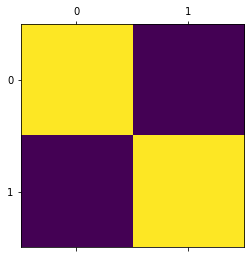

In [39]:
import matplotlib.pyplot as plt

plt.matshow(forplot[['Price_Change_roll', 'Percent_of_PosSent_roll']].corr())
plt.show()

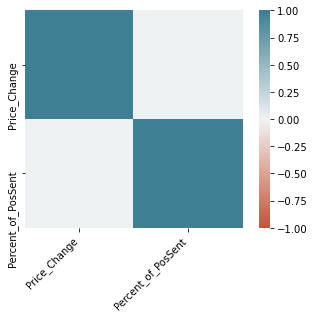

In [40]:
import seaborn as sns

corr = forplot[['Price_Change', 'Percent_of_PosSent']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [41]:
forplot[['Price_Change', 'Percent_of_PosSent']].corr()

,Price_Change,Percent_of_PosSent
Price_Change,1.000000,0.022899
Percent_of_PosSent,0.022899,1.000000


In [42]:
to_roll_list = [' Close', 'Price_Change','Mean_Score', 'Percent_of_PosSent']
roll_col = ['Close_roll', 'Price_Change_roll', 'Mean_Score_roll', 'Percent_of_PosSent_roll']

for i in range(len(to_roll_list)):
    forplot[roll_col[i]] = forplot[to_roll_list[i]].rolling(6, min_periods=1).mean()

In [43]:
forplot[['Price_Change', 'Percent_of_PosSent_roll']].corr()

,Price_Change,Percent_of_PosSent_roll
Price_Change,1.000000,-0.013473
Percent_of_PosSent_roll,-0.013473,1.000000


In [44]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
forplot['forward_roll']=forplot['Percent_of_PosSent'].rolling(window=indexer, min_periods=1).mean()
forplot[['Price_Change', 'forward_roll']].corr()

,Price_Change,forward_roll
Price_Change,1.00000,0.03821
forward_roll,0.03821,1.00000


In [45]:
forplot[['Price_Change', 'forward_roll']].corr().iloc[0,1]

0.038209740921230674

In [46]:
for i in range(1,20):
    forplot['Percent_of_PosSent_roll']=forplot['Percent_of_PosSent'].rolling(i, min_periods=1).mean()
    back = forplot[['Price_Change', 'Percent_of_PosSent_roll']].corr().iloc[0,1]
    print(i-1, back)

0 0.022898941304063787
1 0.009727725679926651
2 -0.00263050771096826
3 -0.010477056235395785
4 -0.01163623286331299
5 -0.013472824139111876
6 -0.011136171471877706
7 -0.0016582866087791299
8 0.006531523230596302
9 0.00651593491596901
10 0.007903430014242109
11 0.01241733926860905
12 0.02018580412337365
13 0.023212790596953164
14 0.026331969301672153
15 0.03249212505564519
16 0.03629757674855644
17 0.0398309733469422
18 0.04060063507241297


In [47]:
for i in range(1,20):
    indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=i)
    forplot['forward_roll']= forplot['Percent_of_PosSent'].rolling(window=indexer, min_periods=1).mean()
    forward = forplot[['Price_Change', 'forward_roll']].corr().iloc[0,1]
    print(i-1, forward)
    

0 0.022898941304063787
1 0.023923335930065185
2 0.038209740921230674
3 0.032308227340979594
4 0.0196427328317079
5 0.007918713339588691
6 0.0017608764745276032
7 -0.0013854264459810487
8 -0.00023691446002033865
9 -0.0031352972080206094
10 -0.009959166201413138
11 -0.013119107990589428
12 -0.009773725689107548
13 -0.006971610458096649
14 -0.006995353086347216
15 -0.013995634111242574
16 -0.015342098317772654
17 -0.016687072159010156
18 -0.013142628134299462


# Feature Engineering for SVM and KNN tuning

In [48]:
FE_df = forplot.drop(columns=[' Open', ' High', ' Low', 'forward_roll', 
                         'Close_roll', 'Price_Change_roll', 'Percent_of_PosSent_roll'])

In [49]:
FE_df

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll
0,2019-01-02,94.00,921050,0.000000,-0.5,0.0,-4.999995e-01
1,2019-01-03,95.00,1956650,0.010638,-0.5,0.0,-4.999995e-01
2,2019-01-04,93.50,2918340,-0.011105,-0.5,0.0,-4.999995e-01
3,2019-01-07,93.00,2523390,-0.010638,-0.5,0.0,-4.999995e-01
4,2019-01-08,91.80,1463860,-0.030623,-0.5,0.0,-4.999995e-01
...,...,...,...,...,...,...,...
613,2021-07-12,87.30,2084810,-0.007955,0.0,0.0,8.333325e-02
614,2021-07-13,85.25,1967070,-0.030699,0.0,0.0,4.166663e-02
615,2021-07-14,86.50,607190,0.011696,0.0,0.0,5.088522e-17
616,2021-07-15,85.00,301870,-0.019608,0.0,0.0,5.088522e-17


In [50]:
FE_df['Stock_T5'] = FE_df[' Close'].shift(periods=-5).ffill()

In [51]:
FE_df[[' Close', 'Stock_T5']].head(10)

,Close,Stock_T5
0,94.0,93.0
1,95.0,94.5
2,93.5,90.0
3,93.0,91.9
4,91.8,93.8
5,93.0,94.5
6,94.5,93.0
7,90.0,93.1
8,91.9,92.0
9,93.8,92.8


In [52]:
move = [] 
for i in range(len(FE_df)):
    GL = (FE_df['Stock_T5'][i]-FE_df[' Close'][i])/FE_df['Stock_T5'][i]
    if GL > 0.01:
        move.append('Up')
    elif GL < -0.01:
        move.append('Down')
    else:
        move.append('Stay')
        
FE_df['Movement'] = move

In [53]:
FE_df[['Date', ' Close', 'Stock_T5']][:10]

,Date,Close,Stock_T5
0,2019-01-02,94.0,93.0
1,2019-01-03,95.0,94.5
2,2019-01-04,93.5,90.0
3,2019-01-07,93.0,91.9
4,2019-01-08,91.8,93.8
5,2019-01-09,93.0,94.5
6,2019-01-10,94.5,93.0
7,2019-01-11,90.0,93.1
8,2019-01-14,91.9,92.0
9,2019-01-15,93.8,92.8


## Feature Engineering with PSEI prices 

In [54]:
PSEI_prices = pd.read_csv("HistoricalPrices.csv")

In [55]:
#Normalized Stock Price Change = stock_delta_price - psei_delta_price

In [56]:
PSEI_prices

,Date,Open,High,Low,Close
0,07/23/21,6600.88,6611.31,6461.75,6520.74
1,07/22/21,6496.97,6586.01,6496.97,6576.62
2,07/21/21,6611.67,6611.67,6451.12,6476.21
3,07/19/21,6665.54,6665.54,6510.43,6587.20
4,07/16/21,6743.78,6783.91,6653.53,6693.83
...,...,...,...,...,...
617,01/08/19,7820.26,7826.08,7702.12,7702.12
618,01/07/19,7800.88,7900.70,7787.66,7787.66
619,01/04/19,7657.18,7801.50,7657.18,7761.11
620,01/03/19,7507.48,7680.60,7490.28,7680.60


In [57]:
PSEI_prices['PSEI_T5'] = PSEI_prices[' Close'].shift(periods=-5).ffill()

In [58]:
PSEI_prices = PSEI_prices[['Date', ' Close', 'PSEI_T5']]
PSEI_prices.rename(columns={' Close': 'PSEI_Close'}, inplace=True)
PSEI_prices['Date'] = pd.to_datetime(PSEI_prices['Date'])

/Users/nillethmaeannvpontino/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/nillethmaeannvpontino/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
PSEI_prices

,Date,PSEI_Close,PSEI_T5
0,2021-07-23,6520.74,6727.93
1,2021-07-22,6576.62,6835.41
2,2021-07-21,6476.21,6795.13
3,2021-07-19,6587.20,6913.87
4,2021-07-16,6693.83,6834.92
...,...,...,...
617,2019-01-08,7702.12,7489.20
618,2019-01-07,7787.66,7489.20
619,2019-01-04,7761.11,7489.20
620,2019-01-03,7680.60,7489.20


In [60]:
FE_df = FE_df.merge(PSEI_prices, how='left', on='Date')

In [61]:
FE_df

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll,Stock_T5,Movement,PSEI_Close,PSEI_T5
0,2019-01-02,94.00,921050,0.000000,-0.5,0.0,-4.999995e-01,93.0,Down,7489.20,7489.20
1,2019-01-03,95.00,1956650,0.010638,-0.5,0.0,-4.999995e-01,94.5,Stay,7680.60,7489.20
2,2019-01-04,93.50,2918340,-0.011105,-0.5,0.0,-4.999995e-01,90.0,Down,7761.11,7489.20
3,2019-01-07,93.00,2523390,-0.010638,-0.5,0.0,-4.999995e-01,91.9,Down,7787.66,7489.20
4,2019-01-08,91.80,1463860,-0.030623,-0.5,0.0,-4.999995e-01,93.8,Up,7702.12,7489.20
...,...,...,...,...,...,...,...,...,...,...,...
613,2021-07-12,87.30,2084810,-0.007955,0.0,0.0,8.333325e-02,86.5,Stay,6913.87,7036.38
614,2021-07-13,85.25,1967070,-0.030699,0.0,0.0,4.166663e-02,86.5,Up,6795.13,6992.43
615,2021-07-14,86.50,607190,0.011696,0.0,0.0,5.088522e-17,86.5,Stay,6835.41,6943.00
616,2021-07-15,85.00,301870,-0.019608,0.0,0.0,5.088522e-17,86.5,Up,6727.93,6924.99


In [62]:
normalized_move = []
normalized_change = []

for i in range(len(FE_df)):
    GL_Stock = (FE_df['Stock_T5'][i]-FE_df[' Close'][i])/FE_df['Stock_T5'][i]
    GL_PSEI = (FE_df['PSEI_T5'][i]-FE_df['PSEI_Close'][i])/FE_df['PSEI_T5'][i]
    
    normalized = GL_Stock - GL_PSEI
    normalized_change.append(normalized)
    
    if normalized > 0.01:
        normalized_move.append('Up')
    elif normalized <= 0.01:
        normalized_move.append('Down')
    else:
        normalized_move.append('Stay')
        
FE_df['Normalized_Change'] = normalized_change        
FE_df['Normalized_Movement'] = normalized_move

In [63]:
FE_df

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll,Stock_T5,Movement,PSEI_Close,PSEI_T5,Normalized_Change,Normalized_Movement
0,2019-01-02,94.00,921050,0.000000,-0.5,0.0,-4.999995e-01,93.0,Down,7489.20,7489.20,-0.010753,Down
1,2019-01-03,95.00,1956650,0.010638,-0.5,0.0,-4.999995e-01,94.5,Stay,7680.60,7489.20,0.020266,Up
2,2019-01-04,93.50,2918340,-0.011105,-0.5,0.0,-4.999995e-01,90.0,Down,7761.11,7489.20,-0.002582,Down
3,2019-01-07,93.00,2523390,-0.010638,-0.5,0.0,-4.999995e-01,91.9,Down,7787.66,7489.20,0.027883,Up
4,2019-01-08,91.80,1463860,-0.030623,-0.5,0.0,-4.999995e-01,93.8,Up,7702.12,7489.20,0.049752,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,2021-07-12,87.30,2084810,-0.007955,0.0,0.0,8.333325e-02,86.5,Stay,6913.87,7036.38,-0.026659,Down
614,2021-07-13,85.25,1967070,-0.030699,0.0,0.0,4.166663e-02,86.5,Up,6795.13,6992.43,-0.013765,Down
615,2021-07-14,86.50,607190,0.011696,0.0,0.0,5.088522e-17,86.5,Stay,6835.41,6943.00,-0.015496,Down
616,2021-07-15,85.00,301870,-0.019608,0.0,0.0,5.088522e-17,86.5,Up,6727.93,6924.99,-0.011115,Down


In [64]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#also try Robust Scaler -> for substantial number of outliers
scaler = StandardScaler()

FE_df['Normalized_Close'] = scaler.fit_transform(FE_df[[' Close']])
FE_df['PSEI_Normalized_Close'] = scaler.fit_transform(FE_df[['PSEI_Close']])
FE_df['Normalized_Volume'] = scaler.fit_transform(FE_df[[' Volume']])

In [65]:
FE_df[FE_df['Normalized_Movement']=="Stay"]

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll,Stock_T5,Movement,PSEI_Close,PSEI_T5,Normalized_Change,Normalized_Movement,Normalized_Close,PSEI_Normalized_Close,Normalized_Volume


# Classification model (SVM)

### SVM

In [66]:
from sklearn.svm import SVC #supportvectorclassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

In [67]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model):
    fig,ax=plt.subplots()

    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [68]:
# create feature matrix (X)
feature_cols = ['Normalized_Close', 'Mean_Score', 'PSEI_Normalized_Close', 'Percent_of_PosSent']
X = FE_df[feature_cols]
y = FE_df['Normalized_Movement']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(494, 4)
Shape of y_Train:(494,)
Shape of X_Test:(124, 4)
Shape of y_Test:(124,)


### Linear SVM

In [69]:
svm_model1 = SVC(kernel='linear')
pred1 = svm_model1.fit(X_train, Y_train) 

In [70]:
#show classification
print(classification_report(y,svm_model1.predict(X)))

              precision    recall  f1-score   support

        Down       0.63      1.00      0.77       387
          Up       0.00      0.00      0.00       231

    accuracy                           0.63       618
   macro avg       0.31      0.50      0.39       618
weighted avg       0.39      0.63      0.48       618



/Users/nillethmaeannvpontino/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nillethmaeannvpontino/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nillethmaeannvpontino/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Tuning the SVM model

### Polynomial kernel

In [71]:
#polynomial kernel
svm_model2 = SVC(kernel='poly', degree=8, gamma="auto")
pred2 = svm_model2.fit(X, y) 

In [72]:
#show classification
print(classification_report(y,svm_model2.predict(X)))

              precision    recall  f1-score   support

        Down       0.64      0.99      0.78       387
          Up       0.81      0.07      0.13       231

    accuracy                           0.65       618
   macro avg       0.73      0.53      0.46       618
weighted avg       0.70      0.65      0.54       618



### SVM-RBF (yielded highest accuracy results)

In [73]:
#radial kernel
svm_model3 = SVC(kernel='rbf', gamma="auto")
pred3 = svm_model3.fit(X, y) 

In [74]:
#show classification
print(classification_report(y,svm_model3.predict(X)))

              precision    recall  f1-score   support

        Down       0.66      0.94      0.77       387
          Up       0.64      0.19      0.29       231

    accuracy                           0.66       618
   macro avg       0.65      0.56      0.53       618
weighted avg       0.65      0.66      0.59       618



In [83]:
#out of sample
print(classification_report(Y_test,svm_model3.predict(X_test)))

              precision    recall  f1-score   support

        Down       0.65      0.92      0.76        74
          Up       0.68      0.26      0.38        50

    accuracy                           0.65       124
   macro avg       0.67      0.59      0.57       124
weighted avg       0.66      0.65      0.61       124



In [84]:
#only sample
print(classification_report(Y_train,svm_model3.predict(X_train)))

              precision    recall  f1-score   support

        Down       0.66      0.94      0.78       313
          Up       0.62      0.17      0.26       181

    accuracy                           0.66       494
   macro avg       0.64      0.55      0.52       494
weighted avg       0.65      0.66      0.59       494



(array([105.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

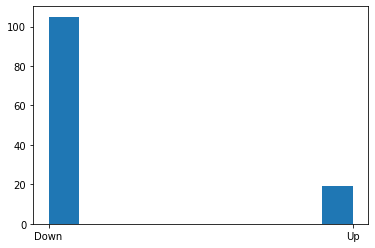

In [85]:
plt.hist(svm_model3.predict(X_test))

(array([74.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

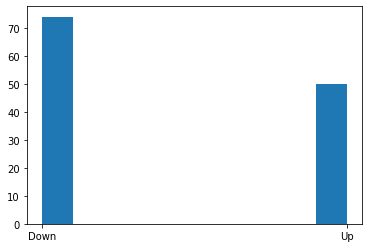

In [86]:
plt.hist(Y_test)

In [75]:
print(confusion_matrix(y,svm_model3.predict(X)))

[[363  24]
 [188  43]]


In [87]:
cnf_matrix = confusion_matrix(y,svm_model3.predict(X))

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [88]:
TPR

array([0.9379845 , 0.18614719])

In [89]:
TNR

array([0.18614719, 0.9379845 ])

In [90]:
FPR

array([0.81385281, 0.0620155 ])

In [91]:
FNR

array([0.0620155 , 0.81385281])

### Sigmoid

In [92]:
#sigmoid
svm_model4 = SVC(kernel='sigmoid', gamma="auto")
pred4 = svm_model4.fit(X, y) 

In [93]:
#show classification
print(classification_report(y,svm_model4.predict(X)))

              precision    recall  f1-score   support

        Down       0.64      0.78      0.70       387
          Up       0.41      0.26      0.31       231

    accuracy                           0.58       618
   macro avg       0.52      0.52      0.51       618
weighted avg       0.55      0.58      0.56       618



### Tuning the hyper-parameters

In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [96]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


In [97]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(Y_test,grid_predictions))
print(classification_report(Y_test,grid_predictions))

[[64 10]
 [38 12]]
              precision    recall  f1-score   support

        Down       0.63      0.86      0.73        74
          Up       0.55      0.24      0.33        50

    accuracy                           0.61       124
   macro avg       0.59      0.55      0.53       124
weighted avg       0.59      0.61      0.57       124

